In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/dataset/test_set/dogs/dog.4329.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4223.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4253.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4190.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4354.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4136.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4226.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4214.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4888.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4170.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4323.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4262.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4788.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4657.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4387.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4255.jpg
/kaggle/input/dataset/dataset/test_set/dogs/dog.4607.jpg
/kaggle/input/dataset/dataset/t

In [5]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image


In [10]:
# Define dataset directories
train_dir = '/kaggle/input/dataset/dataset/training_set'
test_dir = '/kaggle/input/dataset/dataset/test_set'
single_pred_dir = '/kaggle/input/dataset/dataset/single_prediction'


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

# Load Test set
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
cnn = Sequential()

In [15]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [17]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

In [18]:
cnn.add(Flatten())

In [19]:
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))  # Prevent overfitting
cnn.add(Dense(units=1, activation='sigmoid'))

In [20]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=25)

Epoch 1/25


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 250ms/step - accuracy: 0.5245 - loss: 0.6968 - val_accuracy: 0.6520 - val_loss: 0.6616
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.6512 - loss: 0.6421 - val_accuracy: 0.6750 - val_loss: 0.6132
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.6717 - loss: 0.6105 - val_accuracy: 0.6935 - val_loss: 0.5903
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 153ms/step - accuracy: 0.7119 - loss: 0.5699 - val_accuracy: 0.6720 - val_loss: 0.5977
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 150ms/step - accuracy: 0.7151 - loss: 0.5545 - val_accuracy: 0.7160 - val_loss: 0.5565
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 152ms/step - accuracy: 0.7408 - loss: 0.5268 - val_accuracy: 0.7395 - val_loss: 0.5268
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 145ms/step - accuracy: 0.7523 - loss: 0.5054 - val_accuracy: 0.7060 - val_loss: 0.5571
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.7599 - loss: 0.4916 - val

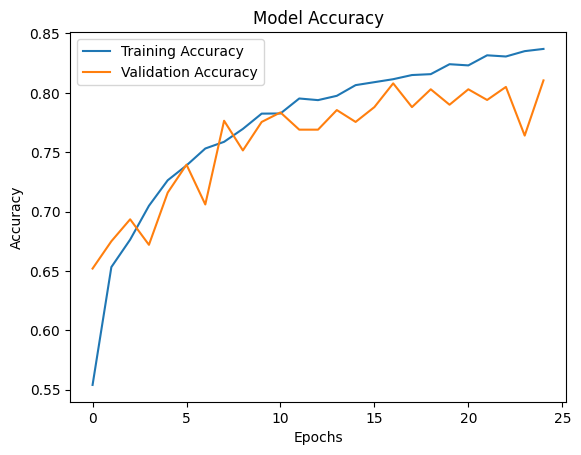

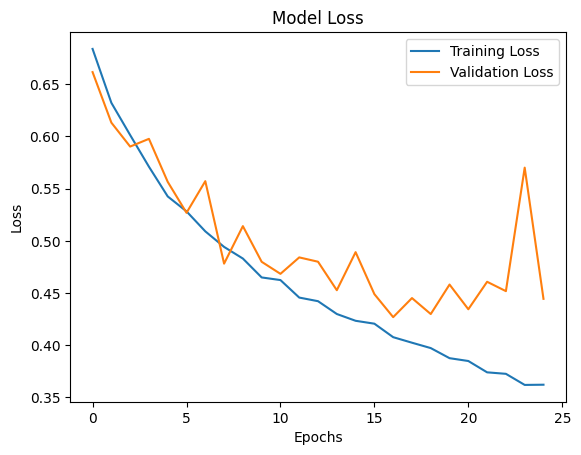

In [22]:
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
def predict_image(image_path):
    test_image = image.load_img(image_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.0  # Rescale

    prediction = cnn.predict(test_image)
    if prediction[0][0] >= 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")


predict_image('/kaggle/input/dataset/dataset/single_prediction/cat_or_dog_2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Prediction: Cat
